In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

In [3]:
file_path = "/Users/mayurimamdi/Downloads/silver_prices_data.csv"

In [4]:
df=pd.read_csv(file_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3768 non-null   object 
 1   Close   3768 non-null   float64
 2   High    3768 non-null   float64
 3   Low     3768 non-null   float64
 4   Open    3768 non-null   float64
 5   Volume  3768 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.8+ KB


In [6]:
df.shape

(3768, 6)

In [7]:
df.head(10)

,Date,Close,High,Low,Open,Volume
0,2011-01-24,27.318001,27.459999,26.955000,27.174999,168
1,2011-01-25,26.811001,26.950001,26.565001,26.915001,77
2,2011-01-26,27.132000,27.025000,26.684999,27.025000,49
3,2011-01-27,27.045000,27.684999,27.410000,27.684999,184
4,2011-01-28,27.934000,27.950001,26.504999,26.695000,64
5,2011-01-31,28.174000,28.129999,27.775000,27.775000,44
6,2011-02-01,28.524000,28.625000,27.995001,27.995001,121
7,2011-02-02,28.299000,28.535000,28.219999,28.219999,20
8,2011-02-03,28.733000,28.905001,28.295000,28.295000,39
9,2011-02-04,29.063999,29.155001,28.790001,28.875000,21


In [8]:
df['year']=df['Date'].str.split('-').str[0]

In [9]:
df['month']=df['Date'].str.split('-').str[1]

In [10]:
df['day']=df['Date'].str.split('-').str[2]

In [11]:
df.drop(columns='Date', axis=1,inplace=True)

In [12]:
df.head()

,Close,High,Low,Open,Volume,year,month,day
0,27.318001,27.459999,26.955000,27.174999,168,2011,01,24
1,26.811001,26.950001,26.565001,26.915001,77,2011,01,25
2,27.132000,27.025000,26.684999,27.025000,49,2011,01,26
3,27.045000,27.684999,27.410000,27.684999,184,2011,01,27
4,27.934000,27.950001,26.504999,26.695000,64,2011,01,28


/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_28591/4035851296.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='Low', ci=None, palette='Set2')
/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_28591/4035851296.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='month', y='Low', ci=None, palette='Set2')


<Axes: xlabel='month', ylabel='Low'>

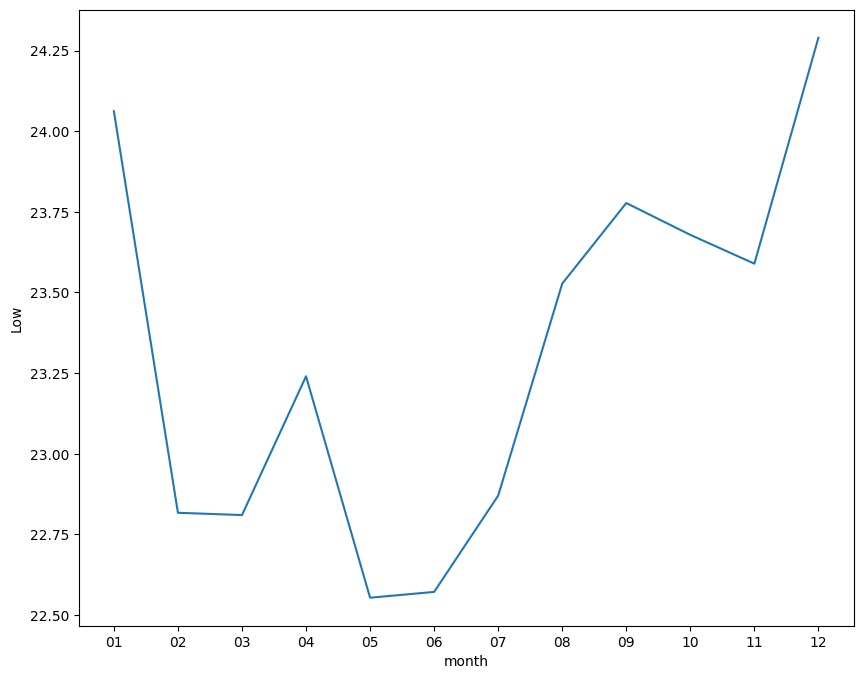

In [13]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='month', y='Low', ci=None, palette='Set2')

<Axes: ylabel='Close'>

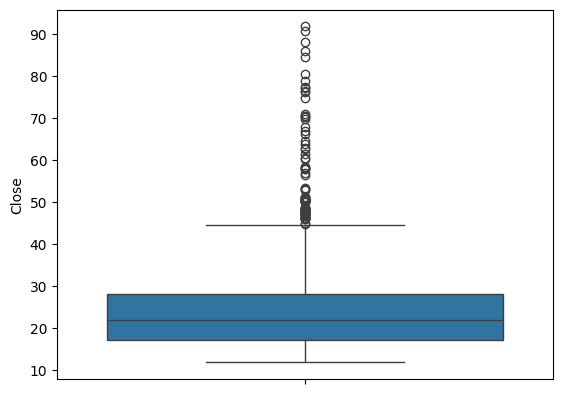

In [14]:
sns.boxplot(df['Close'])

In [15]:
df['day']=df['day'].astype(int)

In [16]:
df['month']=df['month'].astype(int)

In [17]:
df['year']=df['year'].astype(int)

In [18]:
df['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026])

In [19]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_28591/2119192453.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='day', y='High', ci=None, palette='Set2')
/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_28591/2119192453.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='day', y='High', ci=None, palette='Set2')


<Axes: xlabel='day', ylabel='High'>

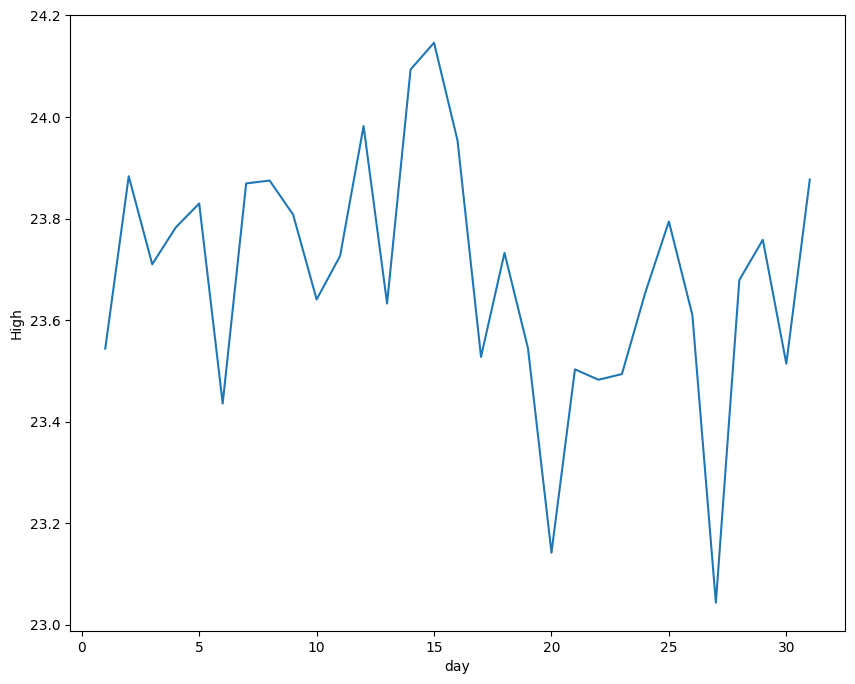

In [20]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='day', y='High', ci=None, palette='Set2')

In [21]:
df['Daily_Range'] = df['High'] - df['Low']


In [22]:
df['Daily_Volatility'] = (df['High'] - df['Low']) / df['Open'] * 100


In [23]:
df[['Open','High','Low','Close','Volume']].corr()


,Open,High,Low,Close,Volume
Open,1.000000,0.999381,0.998890,0.998465,-0.002241
High,0.999381,1.000000,0.998622,0.999133,-0.003069
Low,0.998890,0.998622,1.000000,0.999354,-0.001192
Close,0.998465,0.999133,0.999354,1.000000,-0.002250
Volume,-0.002241,-0.003069,-0.001192,-0.002250,1.000000


In [24]:
df.dtypes

Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
year                  int64
month                 int64
day                   int64
Daily_Range         float64
Daily_Volatility    float64
dtype: object

In [41]:
res=df[df['month']==1].groupby('month')['day'].value_counts().reset_index()


In [42]:
res

,month,day,count
0,1,9,12
1,1,24,12
2,1,31,12
3,1,3,11
4,1,6,11
5,1,8,11
6,1,10,11
7,1,13,11
8,1,23,11
9,1,25,11


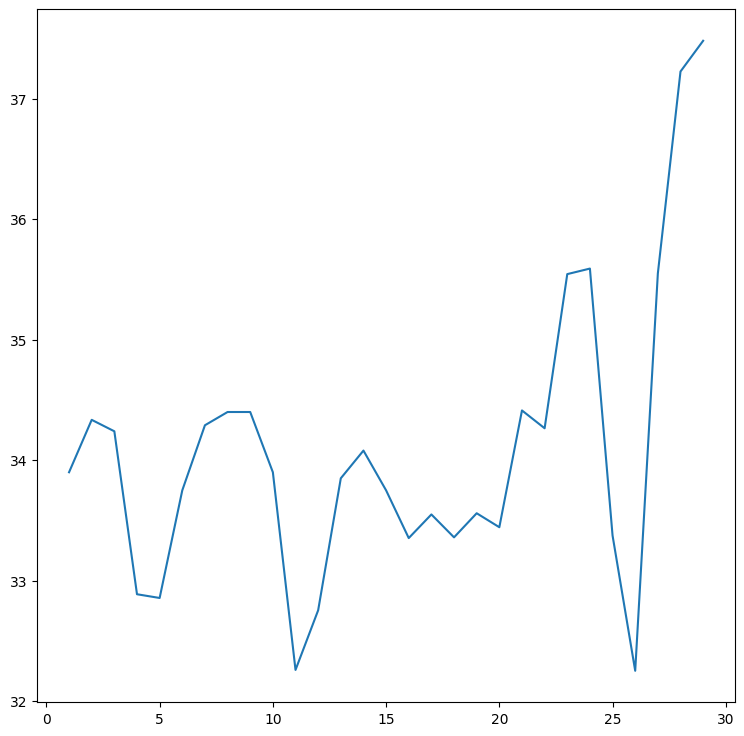

In [51]:
feb=(df[df['month']==2].groupby('day', as_index=False)['High'].max())

plt.figure(figsize=(9,9))
plt.plot(feb['day'],feb['High'])
plt.show()

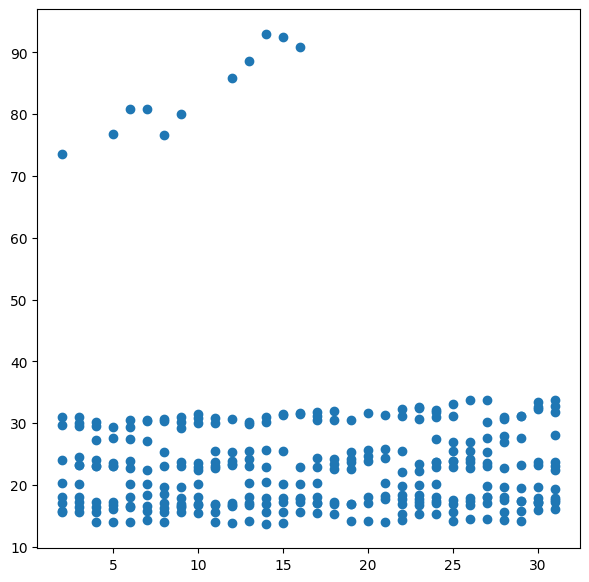

In [45]:
jan=df[df['month']==1]
plt.figure(figsize=(7,7))
plt.scatter(jan['day'], jan['High'])
plt.show()
